### Objetivo

<div style="text-align: justify"><b>
El problema del alquiler de la vivienda ya forma parte del contexto de la mayoría de grandes ciudades del mundo. Hay varios factores que se enumeran como parte del problema: el turismo masivo, la distribución de las ciudades o el auge de los apartamentos turísticos como es el caso de Airbnb. Lo que si queda claro es que los datos obtenidos del portal sirven para obtener una radiografía más o menos valida de la ciudad.
</b></div>

<div style="text-align: justify"><b>
A través del dataset proporcionado en el que se miden las estancias en los últimos años en la ciudad de New York. Hay varias preguntas que nos hacemos. Usaremos para ello el dataset de Moodle.
</b></div>

###### Librerías del código

In [368]:
"""A continuación, se importarán las diferentes librerías que serán utilizadas dentro del programa mediante el comando
'import', además se las nombrará de una manera representativa mediante el comando 'as' """
import numpy as np 
from numpy import *

import math
from math import *
import matplotlib.pyplot as plt 

import pandas as pd
#import seaborn as sb

import sklearn.metrics.pairwise as sk
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings("ignore")

###### Carga de Dataset

In [369]:
datosAirBnB = pd.DataFrame( pd.read_csv('datasets/airbnb.csv', sep = ",", encoding = "latin1"))
Registros = datosAirBnB.shape[0] #Filas del DataSet
Atributos = datosAirBnB.shape[1] #Columnas del DataSet

print("El número de registros o filas será de ", Registros,", mientras que el número de atributos o columnas será de ", Atributos)
datosAirBnB.head(10)

El número de registros o filas será de  48895 , mientras que el número de atributos o columnas será de  16


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


###### Preprocesamiento de los datos

In [370]:
# Preprocesamiento de los datos mediante relleno de nans y eliminar duplicados
datosAirBnB.fillna(0, inplace=True)
datosAirBnB.drop_duplicates(inplace=True)
datosAirBnB.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


###### Transformación datos

In [371]:
import time

datosAirBnBextra = datosAirBnB.copy()

# Calcular los tercios de las reseñas por mes
quantiles_reviews = datosAirBnB["reviews_per_month"].quantile([0.33, 0.66])

# Calcular los tercios de availability_365
quantiles_availability = datosAirBnB["availability_365"].quantile([0.33, 0.66])

#Creacion de la columna de calidad de apartamentos
datosAirBnB['Apartment_Quality'] = pd.Series(len(datosAirBnB), index=datosAirBnB.index)

# Modificación de los datos numericos a categoricos
#Transformacion del numero de reviews_per_month a valores categoricos "Baja", "Media", "Alta"
conditions = [(datosAirBnB['reviews_per_month'] < quantiles_reviews.values[0]),
          (datosAirBnB['reviews_per_month'] >= quantiles_reviews.values[0]) & (datosAirBnB['reviews_per_month'] < quantiles_reviews.values[1]),
          (datosAirBnB['reviews_per_month'] >= quantiles_reviews.values[1])]
choices = ["Baja","Media","Alta"]
datosAirBnB['reviews_per_month'] = np.select(conditions, choices, default = "Blank")
    
#Transformacion del numero de availability_365 a valores categoricos "Poco Disponible","Normalmente Disponible","Altamente Disponible"
conditions = [(datosAirBnB['availability_365'] < quantiles_availability.values[0]),
          (datosAirBnB['availability_365'] >= quantiles_availability.values[0]) & (datosAirBnB['availability_365'] < quantiles_availability.values[1]),
          (datosAirBnB['availability_365'] >= quantiles_availability.values[1])]
choices = ["Poco Disponible","Normalmente Disponible","Altamente Disponible"]
datosAirBnB['availability_365'] = np.select(conditions, choices, default = "Blank")

#Se rellena la columna Apartment_Quality teniendo en cuenta la transformación de reviews_per_month y availability_365,
# con los datos categoricos "Bueno", "Bueno", "Muy bueno", "Regular", "Regular", "Bueno", "Malo", "Malo", "Muy Malo"
conditions = [(datosAirBnB['reviews_per_month'] == 'Baja') & (datosAirBnB['availability_365'] == 'Poco Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Media') & (datosAirBnB['availability_365'] == 'Poco Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Alta') & (datosAirBnB['availability_365'] == 'Poco Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Baja') & (datosAirBnB['availability_365'] == 'Normalmente Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Media') & (datosAirBnB['availability_365'] == 'Normalmente Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Alta') & (datosAirBnB['availability_365'] == 'Normalmente Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Baja') & (datosAirBnB['availability_365'] == 'Altamente Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Media') & (datosAirBnB['availability_365'] == 'Altamente Disponible'),
              (datosAirBnB['reviews_per_month'] == 'Alta') & (datosAirBnB['availability_365'] == 'Altamente Disponible')]
choices = ["Bueno","Bueno","Muy bueno","Regular","Regular","Bueno","Malo","Malo","Muy Malo"]
datosAirBnB['Apartment_Quality'] = np.select(conditions, choices, default = "Blank")


datosAirBnB

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Apartment_Quality
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,Media,6,Altamente Disponible,Malo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,Media,2,Altamente Disponible,Malo
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,Baja,1,Altamente Disponible,Malo
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,Alta,1,Altamente Disponible,Muy Malo
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,Baja,1,Normalmente Disponible,Regular
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,Media,1,Normalmente Disponible,Regular
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,Media,1,Normalmente Disponible,Regular
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,Alta,1,Altamente Disponible,Muy Malo
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,Media,1,Normalmente Disponible,Regular
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,Alta,4,Altamente Disponible,Muy Malo


#### PARTE 1
El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición se puede decir que ostenta el barrio con respecto a los demás que forma New York?

In [372]:
# Ordenamos los datos segun la cantidad de reseñas que tiene cada barrio. Le asignamos una posicion con una nueva
# columna Position, para saber donde estara Williamsburg con respecto al resto de barrios
datosAirBnB2 = datosAirBnB.copy()
datoBarrio = datosAirBnB2.groupby(['neighbourhood']).sum()
datoBarrio1 = pd.DataFrame(datoBarrio,columns=['number_of_reviews']).sort_values(by='number_of_reviews')
datoBarrio1['Position'] = pd.Series(len(datoBarrio1), index=datosAirBnB.index)


for x in range (0, len(datoBarrio1)):
    datoBarrio1['Position'][x] = len(datoBarrio1)-x
print("Posición de los barrios segun numero de reseñas")
datoBarrio1

Posición de los barrios segun numero de reseñas


,number_of_reviews,Position
neighbourhood,,
Fort Wadsworth,0,221.0
Woodrow,0,220.0
New Dorp,0,219.0
"Bay Terrace, Staten Island",3,218.0
Breezy Point,5,217.0
West Farms,7,216.0
Oakwood,9,215.0
Willowbrook,9,214.0
Sea Gate,10,213.0


Tras entregar la posición que tienen cada uno de los barrios dependiendo de los dos factores tenemos como resultado para Williamsburg la siguiente posiciones en la lista

In [374]:
datoBarrio1.reset_index(inplace = True)
for x in range (0, len(datoBarrio1)):
    if datoBarrio1['neighbourhood'][x] == 'Williamsburg':
        print("Posición segun reseñas: ", datoBarrio1['Position'][x])

Posición segun reseñas:  2.0


Con estas posiciones podemos decir que Williamsburg, es en efecto, uno de los barrios de moda hoy en dia, siendo la segunda en numero de reseñas, posicionandola entre los más demandados de todos los barrios de Nueva York

#### Parte 2
Explica visualmente como se distribuyen los 5 más populares barrios (esto serán aquellos cuyos apartamentos estén más solicitados en números absolutos). Para ello utiliza un diagrama de burbuja donde el eje de las X indica el barrio y el eje Y la calidad de los apartamentos. Usa todos los diagramas que necesites para llegar a esta conclusión final.

In [375]:
datosBarrio3 = datosAirBnB.groupby(['neighbourhood']).sum()
print(datosBarrio3.nlargest(5,['number_of_reviews']))

                             id       host_id      latitude     longitude  \
neighbourhood                                                               
Bedford-Stuyvesant  71288376210  233801887505  151112.25667 -274612.46521   
Williamsburg        68791112560  177535858478  159593.24651 -289891.26672   
Harlem              47113859448  159393456628  108488.99605 -196553.79883   
Bushwick            49887640020  160903972314  100317.46664 -182213.72064   
Hell's Kitchen      41406631290  179336244596   79812.30335 -144875.30837   

                     price  minimum_nights  number_of_reviews  \
neighbourhood                                                   
Bedford-Stuyvesant  399917           21130             110352   
Williamsburg        563707           24415              85427   
Harlem              316233           17050              75962   
Bushwick            209033           14456              52514   
Hell's Kitchen      400987           15992              50227   

    

Con esto ya tenemos los 5 barrios que estan más de moda en New York. Estos son Bedford-Stuyvesant, Williamsburg, Harlem, Bushwick y Hell's Kitchen

Con estos datos podemos averiguar como se distribuyen, por la calidad de sus apartamentos, los mejores barrios de New York. Tambien los distribuiremos segun su precio.

##### Por Calidad de apartamentos

In [376]:
datosAirBnBextra['Apartment_Quality'] = pd.Series(len(datosAirBnBextra), index=datosAirBnBextra.index)
datosAirBnBextra['Apartment_Quality']= datosAirBnB['Apartment_Quality']

#Cantidad de apartamentos en el barrio de determinada calidad
datosAirBnBextra['number_Apartment_Quality'] = pd.Series(len(datosBarrio6), index=datosBarrio6.index)
datosAirBnBextra.number_Apartment_Quality = 1

datosBarrio4 = datosAirBnBextra.groupby(['neighbourhood', 'Apartment_Quality']).sum()
print(datosBarrio4.loc[["Bedford-Stuyvesant", "Williamsburg","Harlem", "Bushwick", "Hell's Kitchen"],['number_Apartment_Quality']])

                                      number_Apartment_Quality
neighbourhood      Apartment_Quality                          
Bedford-Stuyvesant Bueno                                   817
                   Malo                                    532
                   Muy Malo                                792
                   Regular                                1573
Bushwick           Bueno                                   487
                   Malo                                    364
                   Muy Malo                                329
                   Regular                                1285
Harlem             Bueno                                   574
                   Malo                                    460
                   Muy Malo                                409
                   Regular                                1215
Hell's Kitchen     Bueno                                   433
                   Malo                                

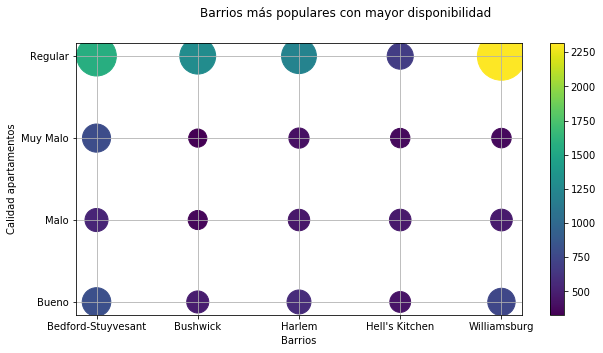

In [377]:
datosBarrio4 = datosBarrio4.reset_index()

rows = ["Bedford-Stuyvesant", "Williamsburg","Harlem", "Bushwick", "Hell's Kitchen"]

datosBurbuja = datosBarrio4[datosBarrio4.neighbourhood.isin(rows)]

plt.figure(figsize=(10,5))
plt.scatter(datosBurbuja['neighbourhood'],
            datosBurbuja["Apartment_Quality"],
            datosBurbuja['number_Apartment_Quality'], 
            c = datosBurbuja['number_Apartment_Quality'])
plt.suptitle('Barrios más populares con mayor disponibilidad')
plt.ylabel('Calidad apartamentos')
plt.xlabel('Barrios')
plt.colorbar()
plt.grid()
plt.show()

##### Por Precio medio de Apartamentos

In [378]:
datosAirBnBextra['Apartment_Quality'] = pd.Series(len(datosAirBnBextra), index=datosAirBnBextra.index)
datosAirBnBextra['Apartment_Quality']= datosAirBnB['Apartment_Quality']


datosBarrio4 = datosAirBnBextra.groupby(['neighbourhood', 'Apartment_Quality']).mean()
print(datosBarrio4.loc[["Bedford-Stuyvesant", "Williamsburg","Harlem", "Bushwick", "Hell's Kitchen"],['price']])

                                           price
neighbourhood      Apartment_Quality            
Bedford-Stuyvesant Bueno              100.383109
                   Malo               136.898496
                   Muy Malo           113.559343
                   Regular             98.623649
Bushwick           Bueno               84.002053
                   Malo                88.228022
                   Muy Malo           106.571429
                   Regular             78.557977
Harlem             Bueno              107.362369
                   Malo               137.613043
                   Muy Malo           131.679707
                   Regular            113.125926
Hell's Kitchen     Bueno              187.900693
                   Malo               254.775161
                   Muy Malo           196.599469
                   Regular            185.797357
Williamsburg       Bueno              133.810667
                   Malo               180.533898
                   M

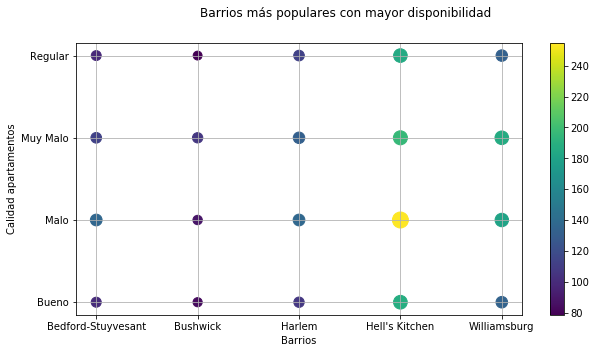

In [379]:
datosBarrio4 = datosBarrio4.reset_index()

rows = ["Bedford-Stuyvesant", "Williamsburg","Harlem", "Bushwick", "Hell's Kitchen"]

datosBurbuja = datosBarrio4[datosBarrio4.neighbourhood.isin(rows)]

plt.figure(figsize=(10,5))
plt.scatter(datosBurbuja['neighbourhood'],
            datosBurbuja["Apartment_Quality"],
            datosBurbuja['price'], 
            c = datosBurbuja['price'])
plt.suptitle('Barrios más populares con mayor disponibilidad')
plt.ylabel('Calidad apartamentos')
plt.xlabel('Barrios')
plt.colorbar()
plt.grid()
plt.show()

Con estas dos graficas, podemos ver como Williamsburg es el barrio que mejor calidad apartamentos tiene, comparandolos con el resto de barrios, aunque en precio es el 4 más barato de los 5.

#### Parte 3
Una vez obtenida la información del apartado anterior, queremos tratar de entender las diferencias de precio entre alquilar un apartamento entero y una habitación privada. Usa los diagramas de cajas donde cada uno de los 5 barrios más populares está representado por una caja y haz una interpretación de los resultados.

Realizamos una agrupacion de los datos por vecindario y tipo de habitación y realizamos la media de los demás valores al agruparlos. Mostraremos por pantalla unicamente los valores del precio medio, que es el que nos interesa.

In [380]:
datosBarrio5 = datosAirBnBextra.groupby(['neighbourhood', 'room_type']).mean()
print(datosBarrio5.loc[["Bedford-Stuyvesant", "Williamsburg","Harlem", "Bushwick", "Hell's Kitchen"],['price']])

                                         price
neighbourhood      room_type                  
Bedford-Stuyvesant Entire home/apt  154.780641
                   Private room      73.296860
                   Shared room       50.376471
Bushwick           Entire home/apt  145.784661
                   Private room      62.623037
                   Shared room       37.382353
Harlem             Entire home/apt  177.595560
                   Private room      81.950413
                   Shared room       68.081633
Hell's Kitchen     Entire home/apt  254.242628
                   Private room     133.501488
                   Shared room       95.838384
Williamsburg       Entire home/apt  206.094130
                   Private room      85.761142
                   Shared room       84.937500


Con estos datos, realizamos un grafico de cajas en el que mostramos las diferencias entre los precios de los distintos tipos de habitación, excluyendo el de las habitaciones compartidas

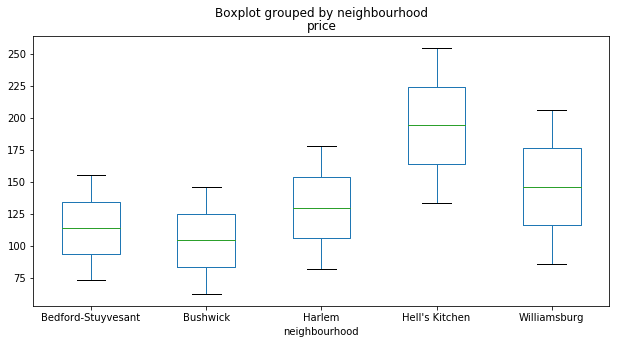

In [381]:
datosBarrio5 = datosBarrio5.reset_index()

rows = ["Bedford-Stuyvesant", "Williamsburg","Harlem", "Bushwick", "Hell's Kitchen"]

datosBurbuja = datosBarrio5[datosBarrio5.neighbourhood.isin(rows)]
datosBurbuja = datosBurbuja[datosBurbuja.room_type != 'Shared room'] #Eliminamos los datos de las habitaciones compartidas
datosBurbuja.boxplot(by='neighbourhood', 
                       column=['price'], 
                       grid=False,
                       figsize=(10,5))
plt.show()

Con esta grafica podemos ver que hay dos grupos de datos. Los 3 primeros barrios la diferencia entre los dos tipos de habitación es bastante parecida (entre los 95 y 80 dolares de diferencia) por lo que formarian el primer grupo. El segundo grupo estaria formado por los 2 ultimos barrios, en los que la diferencia de precios es similar (superando los 100 dolares de diferencia).

#### Parte 4
Por último, se intuye que la tendencia a dejar reseñas en las apps que prestan servicios a aumentado en los últimos años. Decide que diagrama es más útil para este caso. Dibújalo y realiza una interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso.




Lo primero que haremos sera agrupar el dataset por los datos de la ultima review realizada. Despues, cambiaremos esta columna para que nos muestre solamente el año y no el mes y el dia tambien. Tras eso, crearemos una columna para poder contar el numero de ultimas reseñas cuando agrupemos otra vez los datos por la columna de last_review, aunque en este caso se unificaran en un año y sabremos el numero de ultimas reviews se han realizado por año, como se pide en el enunciado

In [384]:
datosBarrio6 = datosAirBnBextra.groupby(['last_review']).sum()
datosBarrio6 = datosBarrio6.drop([0])
datosBarrio6 = datosBarrio6.reset_index()

conditions = [(datosBarrio6['last_review'] >= "2011-01-01") & (datosBarrio6['last_review'] <= "2011-12-31"),
              (datosBarrio6['last_review'] >= "2012-01-01") & (datosBarrio6['last_review'] <= "2012-12-31"),
              (datosBarrio6['last_review'] >= "2013-01-01") & (datosBarrio6['last_review'] <= "2013-12-31"),
              (datosBarrio6['last_review'] >= "2014-01-01") & (datosBarrio6['last_review'] <= "2014-12-31"),
              (datosBarrio6['last_review'] >= "2015-01-01") & (datosBarrio6['last_review'] <= "2015-12-31"),
              (datosBarrio6['last_review'] >= "2016-01-01") & (datosBarrio6['last_review'] <= "2016-12-31"),
              (datosBarrio6['last_review'] >= "2017-01-01") & (datosBarrio6['last_review'] <= "2017-12-31"),
              (datosBarrio6['last_review'] >= "2018-01-01") & (datosBarrio6['last_review'] <= "2018-12-31"),
              (datosBarrio6['last_review'] >= "2019-01-01") & (datosBarrio6['last_review'] <= "2019-12-31")]
choices = ["2011","2012","2013","2014","2015","2016","2017","2018","2019"]
datosBarrio6['last_review'] = np.select(conditions, choices, default = "Blank")
datosBarrio6['number_last_review'] = pd.Series(len(datosBarrio6), index=datosBarrio6.index)
datosBarrio6.number_last_review = 1

datosBarrio6 = datosBarrio6.groupby(['last_review']).sum()
datosBarrio6.number_last_review

last_review
2011      7
2012     22
2013     41
2014    132
2015    296
2016    358
2017    354
2018    365
2019    189
Name: number_last_review, dtype: int64

Con estos datos realizaremos una grafica para observar el aumento de las reseñas en los ultimos años

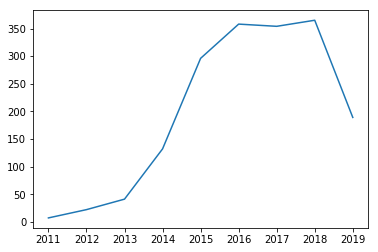

In [383]:
datosBarrio6 = datosBarrio6.reset_index()
plt.plot(datosBarrio6['last_review'],
            datosBarrio6["number_last_review"])
plt.show()

Como podemos observar, la tendencia de dejar reseñas (teniendo en cuenta solo las ultimas reseñas, como se nos indica en el enunciado) ha aumentado progresivamente durante los años hasta que, a partir del 2016, se ha estabilizado. Decimos esto a pesar de que en el 2019 hay una clara bajada de ultimas reseñas, pero esto, creemos que es debido a que no ha finalizado el año y le faltan aun muchos meses (acaba al principio del mes de Julio de ese año) en los que se pueden realizar el resto de reseñas que faltan. Ademas, si tenemos en cuenta el numero de reseñas del 2019 (189) y del 2018 (365) teniendo en cuenta que en el 2019 solo se tiene medio año, podemos llegar a tener la misma o incluso superar la cifra de ultimas reseñas que en el 2018